# Klasse G versterkers

In [1]:
from cursusdef import *

## Indeling vermogenversterkers

In {numref}`vermogenversterkersG` hernemen we een overzicht van de verschillende versterkers die we bespreken in de leerlijn analoge elektronica.

:::{list-table} Indeling van de vermogenversterkers
:header-rows: 1
:name: vermogenversterkersG

* - 
  - laagfrequent of breedband
  - hoogfrequent of resonant
* - 1 transistor in de vermogentrap
  - Klasse A
  - Klasse C <BR> Klasse F <BR>Klasse E
* - 2 of meer  transistors in de vermogentrap
  - Klasse B  <BR> **Klasse G**
  - Klasse D
:::

## Basisschema 

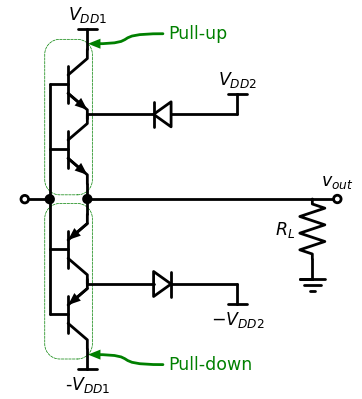

In [15]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='down', l=1.3)
    T1s = BjtNpn( d='right')
    Line(xy=T1s.base, d='down', l=1)
    indot=Dot()
    Line(d='down', l=1)
    T2s = BjtPnp( d='right')
    Line(xy=T2s.base, d='down', l=1.3)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  label='$V_{DD1}$')
    Diode(xy=T1s.collector,reverse=True, d='right') 
    Vdd(label='$V_{DD2}$')
    
    Vss(xy=T2.collector,label='-$V_{DD1}$')
    Diode(xy=T2s.collector,d='right') 
    Vss(label='$-V_{DD2}$')
    
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True)
    
    Line(d='down',xy=T1s.emitter, l=0.3)
    outdot=Dot()
    Line(d='down',toy=T2s.emitter)
    
    Line(xy=outdot.start,  d='right', l=4.5)
    R = Resistor(d='down',l=1.2, label='$R_L$')
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    pullup = EncircleBox([T1,T1s],padx=.1).linestyle('--').linewidth(0.5).color('green')
    Annotate(th1=0).at(pullup.NE).delta(dx=1.5, dy=0.2).label('Pull-up').color('green')
    pulldown = EncircleBox([T2,T2s],padx=.1).linestyle('--').linewidth(0.5).color('green')
    Annotate(th1=0).at(pulldown.SE).delta(dx=1.5, dy=-0.2).label('Pull-down').color('green')

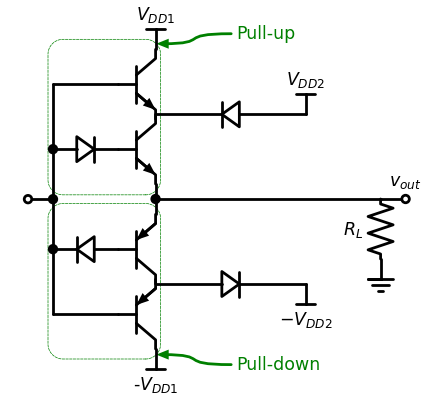

In [16]:
with schemdraw.Drawing():
    T1 = BjtNpn()
    Line(xy=T1.base, d='left', l=1.3)
    Line( d='down', l=1.3)
    dot1 = Dot()
    d1 = Diode(d='right', l=1.3)
    T1s = BjtNpn( d='right')
    Line(xy=dot1.start, d='down', l=1)
    indot=Dot()
    Line(d='down', l=1)
    dot2=Dot()
    d2 = Diode(d='right',reverse=True, l=1.3)
    T2s = BjtPnp( d='right')
    Line(xy=dot2.start, d='down', l=1.3)
    Line(d='right', l=1.3)
    T2 = BjtPnp(  d='right')
    
    Vdd(xy=T1.collector,  label='$V_{DD1}$')
    Diode(xy=T1s.collector,reverse=True, d='right') 
    Vdd(label='$V_{DD2}$')
    
    Vss(xy=T2.collector,label='-$V_{DD1}$')
    Diode(xy=T2s.collector,d='right') 
    Vss(label='$-V_{DD2}$')
    
    Line(xy=indot.start, d='left', l=0.5)
    Dot(open=True)
    
    Line(d='down',xy=T1s.emitter, l=0.3)
    outdot=Dot()
    Line(d='down',toy=T2s.emitter)
    
    Line(xy=outdot.start,  d='right', l=4.5)
    R = Resistor(d='down',l=1.2, label='$R_L$')
    Ground()
    Line(xy=R.start, d='right', l=0.5)
    Dot(open=True, label='$v_{out}$')
    
    pullup = EncircleBox([T1,T1s,d1],padx=.1).linestyle('--').linewidth(0.5).color('green')
    Annotate(th1=0).at(pullup.NE).delta(dx=1.5, dy=0.2).label('Pull-up').color('green')
    pulldown = EncircleBox([T2,T2s,d2],padx=.1).linestyle('--').linewidth(0.5).color('green')
    Annotate(th1=0).at(pulldown.SE).delta(dx=1.5, dy=-0.2).label('Pull-down').color('green')

In [5]:
spicelisting("simul/classG1.sp")

Klasse G versterker
*
* SUPPLY VOLTAGES
VPOS1 8 0 DC	+70
VNEG1 6 0 DC	-70V
VPOS2 5 0 DC	+20V
VNEG2 4 0 DC	-20V
*
*  input source
VS1 1 0	DC 0 SIN(0V 48VPEAK 10KHZ)
*
*  PUSH-PULL TRANSISTOR OUTPUT STAGE
Q1h 8 1 9 QNPN
Q1s 9 12 2 QNPN
Q2s 7 13 2 QPNP
Q2h 6 1 7 QPNP
*
Dpos 5 9 DNOM
Dneg 7 4 DNOM
*
*compensatie Vsat
Db1 1 12 DNOM
Db4 13 1 DNOM
*
* Load resistance
RL1 2 0	8
*
* DEVICE MODELS
.model QNPN NPN(BF=50)
.model QPNP PNP(BF=50)
.model DNOM D()

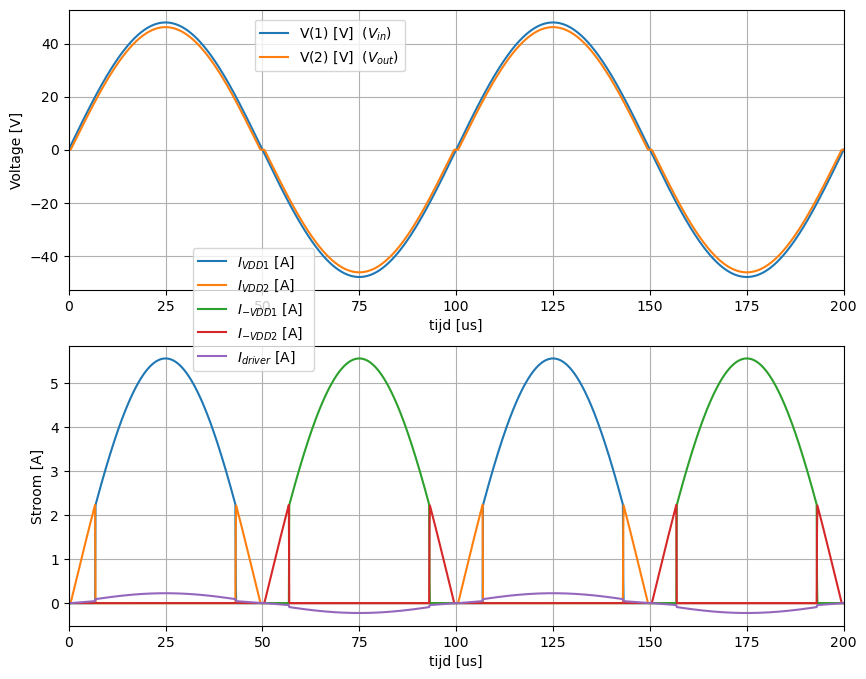

In [17]:
circuit=SpiceParser(path='simul/classG1.sp').build_circuit()     # CHECK DISTORTION WITH FOURIER SERIES ANALYSIS    ==> .FOUR 10KHZ V(12) 
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos1'],label='$I_{VDD1}$ [A] ')
ax[1].plot(analysis.time*1e6,-analysis.branches['vpos2'],label='$I_{VDD2}$ [A] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg1'],label='$I_{-VDD1}$ [A]  ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg2'],label='$I_{-VDD2}$ [A]  ')
ax[1].plot(analysis.time*1e6,-analysis.branches['vs1'],label='$I_{driver}$ [A]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [A]')
plt.show()

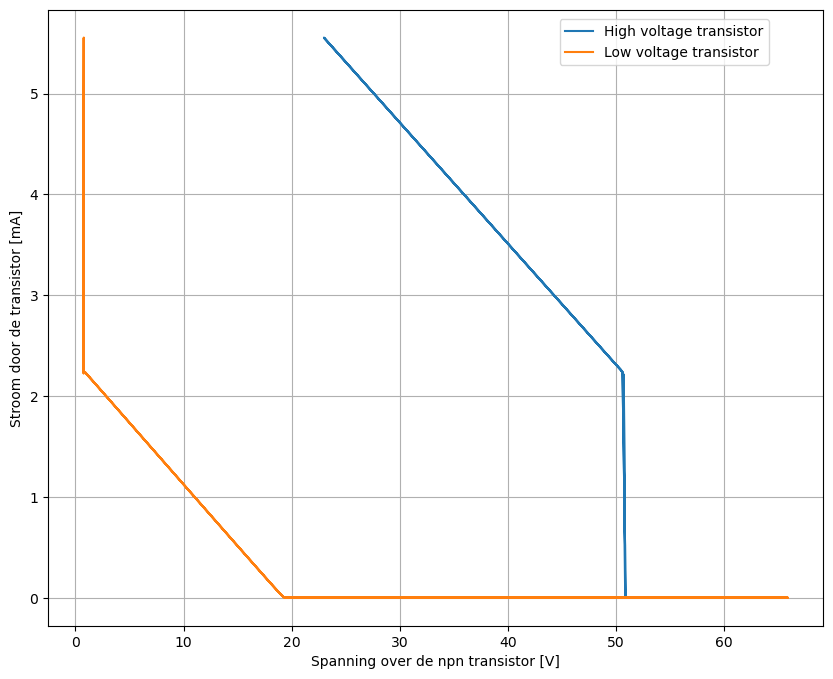

In [18]:
figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['8']-analysis.nodes['9'],-analysis.branches['vpos1'],label='High voltage transistor')
ax.plot(analysis.nodes['9']-analysis.nodes['2'],-analysis.branches['vpos1']-analysis.branches['vpos2'],label='Low voltage transistor')
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
ax.legend( loc=(0.66,.91));

Het toevoegen van een beveiliging gebeurt op dezelfde wijze als voor de klasse B. Het uitgangspunt is steeds:

* de spanning over ...
* de stroom door ...
* de opwarming van ...

het pull-up netwerk en het pull-down netwerk, zoals aangegeven in de omcirkelde gebieden in {numref}`Gfig1`